# Large-sample confidence intervals: difference between two proportions

date: 2021-04-16

aim: Calculate a 100(1-a)% approximate confidence interval
for the difference between two proportions.

reference: M248 Computer book B, Activity 20

data: sewer.csv

description: Occupational risk to sewerage workers of hepatitis
A infection though contact with raw sewage.

Relevant fields for this example:

- Immunity=(0=no immunity, 1=immunity)
- Children=(0=no children, 2=children)

module: `statsmodels`

## Setup

In [1]:
from src import load
from statsmodels.stats.proportion import confint_proportions_2indep
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import the data
sewer = load.sewer()

In [3]:
# replace entries with meaningful input
sewer["Immunity"].replace({0: "No", 1: "Yes"}, inplace=True)
sewer["Children"].replace({1: "No", 2: "Yes"}, inplace=True)

## Visualise

In [4]:
# group the data and count
gsewer = sewer.groupby(["Immunity", "Children"]).count()
gsewer.reset_index(inplace=True)
gsewer.rename(columns={"Age": "Freq"}, inplace=True)

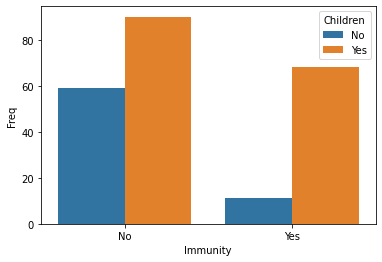

In [5]:
# plot the data
ax = sns.barplot(
    data=gsewer,
    x="Immunity",
    y="Freq",
    hue="Children")
plt.show()

## Calculate a 100(1-a)% confidence interval

Construct a contingency table showing Children against Immunity.

In [6]:
pd.crosstab(
    index=sewer["Children"],
    columns=sewer["Immunity"],
    margins=True)

Immunity,No,Yes,All
Children,,,
No,59,11,70
Yes,90,68,158
All,149,79,228


Note the default actual argument for formal agument
`method=newcomb`, but this does not return the result expected in
M248.

In [7]:
confint_proportions_2indep(
    count1=68,  # has children, has immunity
    nobs1=158,  # has children
    count2=11,  # no children, has immunity
    nobs2=70,   # no children
    method="wald")

(0.1582197356059404, 0.38825404377923145)